In [3]:
import os
os.chdir('../')
import sklearn.datasets as datasets
import pandas as pd
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from datasets import toyData
%matplotlib inline

In [4]:
root_dir = '/mnt/cloud/yzeng58'

In [38]:
def toyData(train_val_test = (0.6,0.2,0.2), seed = 123, var = 0.001, outlier = 1):
    np.random.seed(seed)
    X, Y, dfs, centers = {}, {}, {}, defaultdict(dict)
    
    centers[0][0] = [(0,5), (0,3), (0,2), (0,1)]
    centers[0][1] = [(1,5), (1,3), (1,2), (1,1)]

    centers[1][0] = [(1,4)]
    centers[1][1] = [(0,4)]
    
    cluster_num = 100
    for a in centers:
        X[a], Y[a] = [], []
        for y in centers[a]:
            for center in centers[a][y]:
                X[a].append(np.random.multivariate_normal(center, np.eye(2)*var, cluster_num))
                Y[a].append(np.ones(cluster_num) * y)
        X[a], Y[a] = np.concatenate(X[a]), np.concatenate(Y[a])
        dfs[a] = pd.DataFrame(X[a], columns = ['x1', 'x2'])
        dfs[a]['y'] = Y[a]
        dfs[a]['a'] = a
        
    data_df = pd.concat([dfs[a] for a in centers], ignore_index = True).sample(frac = 1, random_state = seed).reset_index(drop = True)
    
    split_df = {}
    frac_train, frac_val, frac_test = train_val_test
    n_tot = len(data_df)
    n_train, n_val = int(frac_train*n_tot), int(frac_val*n_tot)
    n_test = n_tot - n_train - n_val
    split_df['train'], split_df['val'], split_df['test'] = data_df.iloc[:n_train], data_df.iloc[n_train: (n_train + n_val)], data_df.iloc[(n_train + n_val):], 
    
    if outlier: # randomly flip the labels
#         outlier_index = split_df['train'].sample(frac = .05, random_state = 2*seed).index.tolist()
#         split_df['train'].loc[outlier_index, 'y'] = 1 - split_df['train'].loc[outlier_index].y
#         split_df['train'].loc[outlier_index, 'a'] = 2
        X = np.random.multivariate_normal((0.5,2.5), np.eye(2)*10, 20)
        keep_idx = (X.T[0] >= 1.5) | (X.T[0] <= -0.5) | (X.T[1] >= 6) | (X.T[1] <= 0)
        X = X[keep_idx]
        num = keep_idx.sum()
        Y = np.random.choice([0,1], num)
        A = np.random.choice([0,1], num)
        outlier_df = pd.DataFrame(X, columns = ['x1', 'x2'])
        outlier_df['y'] = Y
        outlier_df['a'] = A
        split_df['train'] = pd.concat([split_df['train'], outlier_df]).sample(frac = 1, random_state = seed).reset_index(drop = True)
    
    for mode in ['train', 'val', 'test']:
        file_name = '%s/privateDemographics/data/toy/%s_outlier_%d.csv' % (root_dir, mode, outlier)
        split_df[mode].to_csv(file_name, index = False)
            
    return split_df


In [54]:
def toyData(train_val_test = (0.6,0.2,0.2), seed = 123, var = 0.001, outlier = 1):
    np.random.seed(seed)
    X, Y, dfs, centers = {}, {}, {}, defaultdict(dict)
    
    centers[0][0] = [(0,5), (0,3), (0,2), (0,1)]
    centers[0][1] = [(1,5), (1,3), (1,2), (1,1)]

    centers[1][0] = [(1,4)]
    centers[1][1] = [(0,4)]
    
    cluster_num = 100
    for a in centers:
        X[a], Y[a] = [], []
        for y in centers[a]:
            for center in centers[a][y]:
                X[a].append(np.random.multivariate_normal(center, np.eye(2)*var, cluster_num))
                Y[a].append(np.ones(cluster_num) * y)
        X[a], Y[a] = np.concatenate(X[a]), np.concatenate(Y[a])
        dfs[a] = pd.DataFrame(X[a], columns = ['x1', 'x2'])
        dfs[a]['y'] = Y[a]
        dfs[a]['a'] = a
        
    data_df = pd.concat([dfs[a] for a in centers], ignore_index = True).sample(frac = 1, random_state = seed).reset_index(drop = True)
    
    split_df = {}
    frac_train, frac_val, frac_test = train_val_test
    n_tot = len(data_df)
    n_train, n_val = int(frac_train*n_tot), int(frac_val*n_tot)
    n_test = n_tot - n_train - n_val
    split_df['train'], split_df['val'], split_df['test'] = data_df.iloc[:n_train], data_df.iloc[n_train: (n_train + n_val)], data_df.iloc[(n_train + n_val):], 
    
    if outlier: # randomly flip the labels
        outlier_index = split_df['train'].sample(frac = .05, random_state = 2*seed).index.tolist()
        split_df['train'].loc[outlier_index, 'y'] = 1 - split_df['train'].loc[outlier_index].y
        split_df['train'].loc[outlier_index, 'a'] = np.random.choice([0,1], len(outlier_index))
    
    for mode in ['train', 'val', 'test']:
        file_name = '%s/privateDemographics/data/toy/%s_outlier_%d.csv' % (root_dir, mode, outlier)
        split_df[mode].to_csv(file_name, index = False)
            
    return split_df


In [55]:
df = toyData(var = 0.1, outlier = 1)

In [56]:
np.unique(df['train'].a, return_counts = True)

(array([0, 1, 2]), array([453, 117,  30]))

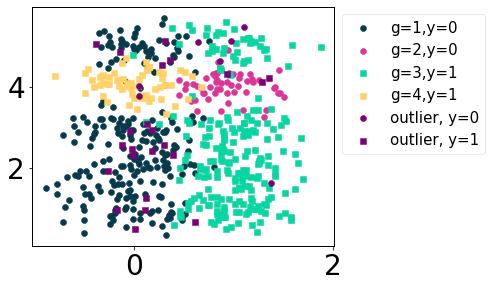

In [98]:
width = 7
height = 4


# plt.rc('font', family='serif', serif='times new roman')
# plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend
mpl.rcParams['lines.linewidth'] = 2

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
fig.subplots_adjust(left=.08, bottom=.12, right=0.68, top=0.95, wspace=0.2, hspace=0.05) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure
markers = ['o', 'o','s', 's','o','s']
colors = ['#073B4C','#DD3497','#06D6A0','#FFD166', '#7A0177','#7A0177']

label = ['g=1,y=0','g=2,y=0','g=3,y=1','g=4,y=1','outlier, y=0', 'outlier, y=1']
i = -1
for y in [0,1]:
    for a in range(2):
        i+=1
        data = df['train'][(df['train'].y == y) & (df['train'].a == a)]
        ax.scatter(data.x1, data.x2, c = colors[i], marker = markers[i], label = label[i])
        
for y in [0,1]:
    for a in [2]:
        i+=1
        data = df['train'][(df['train'].y == y) & (df['train'].a == a)]
        ax.scatter(data.x1, data.x2, c = colors[i], marker = markers[i], label = label[i])

            # ax.scatter(data.x1, data.x2, c = colors[a], marker = markers[y])
ax.legend(bbox_to_anchor=(1,1),fontsize = 15)
plt.savefig('%s/privateDemographics/figures/contaminated_syn.pdf' % root_dir)

In [ ]:
df = {}
df[0] = [(0,0.5,0.7), (-1,0.1,0.6), (-1,1,0.8), (-2,0.5), (-3,0.1),(-3,1)]
df[1] = [(2,0.1),(2,1),((3,0.5))]